In [34]:
import numpy as np
import pandas as pd
import pylab as pl #untuk plotting
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [35]:
data = pd.read_csv('data/cakar-ihbs.csv')
data

,nama,alamat,kota,nomor_telepon,email,universitas/sekolah_asal,jurusan,IPK,riwayat_pekerjaan,pengalaman,posisi_yang_dilamar,nilai_psikotest,media_sosial,jumlah_unggahan,tingkat_interaksi,jumlah_pengikut,jenis_konten,rekomendasi
0,Nuro Azlina Puadi,Jl. Koperasi No. 79 Aikmel,Lombok Timur NTB,6285640419208,azlinafuadi571@gmail.com,Bina Madani Putri Magelang,IPA,3.43,Bina Madani Putri Magelang,1,Musyrifah,82,Instagram,16,15,100,Positif,Diterima
1,Shabrina Ainimeiko,Jl. Jawa II Blok N5/6 Reni Jaya,Kec. Pamulang,6285710711806,sainimeiko@gmail.com,LIPIA Jakarta,Bahasa Arab,4.60,Al Buruj Learning Center,1,Guru Bahasa Arab,80,Twitter,19,23,90,Positif,Diterima
2,Fauzi Anis Nazhip,Jl. Jend A Yani Lr. 15,Makassar,6282350645243,Fauzianis24@gmail.com,LIPIA Jakarta,Bahasa Arab,4.80,SD Al-Fallah kalibata,3,Guru Bahasa Arab,60,Facebook,18,25,74,Positif,Diterima
3,Nadia Chairunnisa,Jl. Pepaya IV No.18A Cengkareng Barat,Jakarta Barat,6285761063974,nchairunnisa7@gmail.com,Universitas Negeri Jakarta,Pendidikan Sosiologi,3.64,SMA 25 Jakarta,3,Guru Sosiologi,65,Twitter,10,12,80,Negatif,Ditolak
4,Afian,Jalan Musa Karim Salu Karema,Majene,6285340618670,alfianalbungsu@gmail.com,STIKES Marendeng Majene,Perawat,3.92,Klinik Badr Alkhaleej Medical Center,1,Petugas UKS,75,Facebook,20,15,100,Positif,Diterima
5,Ahmad Wildan,Jl. Lebak bulus dalam No. 11,Jakarta Selatan,628551875559,wildanahmaf19@gmail.com,Institut PTIQ Jakarta,Manajemen Pendidikan,3.51,SMP Al Madinah,3,Musyrif,80,Instagram,24,20,95,Positif,Diterima
6,Habibi,Jl. Sultan Agung Tirtayasa Kp.Sipon RT/RW 04 0...,Serang Banten,6285779867203,habiebee.it@gmail.com,Islamic Center Wadi Mubarak,Ilmu Al-Quran Dan Tafsir,2.64,SMP Ponpes Riyadusshalihin,2,Musyrif,80,Twitter,20,10,100,Negatif,Ditolak
7,Ayu siti fatimah,Perumahan Graha Arradea Dramaga,Bogor,62895378578282,fatimah13.ayusiti@gmail.com,Universitas Ibn Kaldun,Ekonomi Syariah,3.69,SMP Pondok Media Islamic Boarding School,1,Guru Umum SD,67,Facebook,15,20,95,Negatif,Ditolak
8,Muhammad Rendy Arifiyanto,Kp.Pasir hayam Rt.03/01 Desa Sirnagalih Kec.C...,Bandung,6281218552477,asrirendi76@gmail.com,Universitas Terbuka,Ilmu Perpustakaan,2.00,Sekolah Dasar Negeri Merdeka Bandung,3,Pustakawan,85,Twitter,10,50,90,Negatif,Ditolak
9,Nur farida rachmi,Puri kosambi blok ii 16 klari,Karawang,6285173151901,faridanoorfa@gmail.com,STAI Siliwangi Bandung,Pendidikan Agama Islam,2.97,SD Tahfidz Ibnu Umar,2,Guru Umum SD,81,Instagram,10,19,90,Positif,Diterima


In [36]:
cdata = data[['nama','nilai_psikotest','jumlah_pengikut','rekomendasi']]
cdata.head(10)

KeyError: "['rekomendasi'] not in index"

In [23]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [24]:
# cek Nan & Imputasi
y.isnull().sum()

0

In [25]:
# ubah dari dataframe / series pandas menjadi np.array
X = X.values
y = y.values

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

print(X_train.head())
print(y_train.head())

                   0                                                  1   \
0               Afian                       Jalan Musa Karim Salu Karema   
1   Nur farida rachmi                      Puri kosambi blok ii 16 klari   
2  Shabrina Ainimeiko                    Jl. Jawa II Blok N5/6 Reni Jaya   
3              Habibi  Jl. Sultan Agung Tirtayasa Kp.Sipon RT/RW 04 0...   
4    Ayu siti fatimah                    Perumahan Graha Arradea Dramaga   

               2               3                             4   \
0          Majene   6285340618670      alfianalbungsu@gmail.com   
1        Karawang   6285173151901        faridanoorfa@gmail.com   
2   Kec. Pamulang   6285710711806          sainimeiko@gmail.com   
3   Serang Banten   6285779867203         habiebee.it@gmail.com   
4           Bogor  62895378578282   fatimah13.ayusiti@gmail.com   

                             5                          6     7   \
0       STIKES Marendeng Majene                    Perawat  3.92   
1   

In [28]:
# buat objek regressor dan latih dengan data train
regr = LinearRegression()
regr.fit(X_train, y_train)

ValueError: could not convert string to float: 'Afian'

,nilai_psikotest,jumlah_unggahan,tingkat_interaksi,jumlah_pengikut
0,82,16,15.0,100
1,80,19,23.0,80
2,60,13,2.5,90
3,65,10,12.0,80
4,75,20,15.0,100
5,80,24,20.0,95
6,80,20,10.0,100
7,67,15,20.0,95
8,85,10,50.0,90


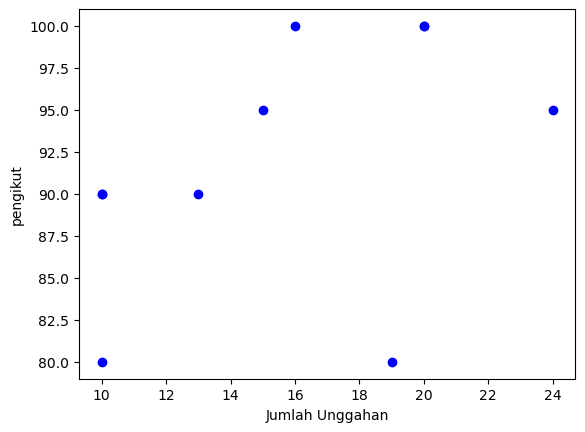

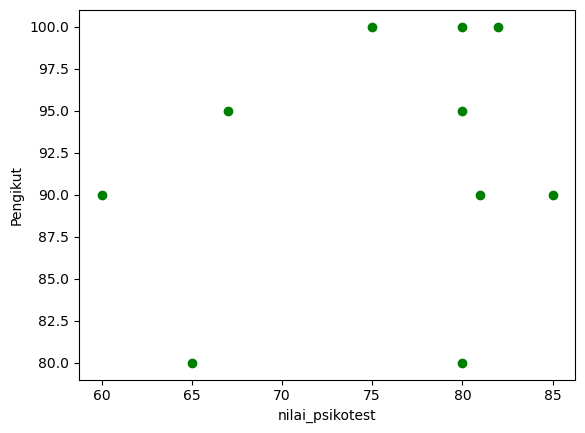

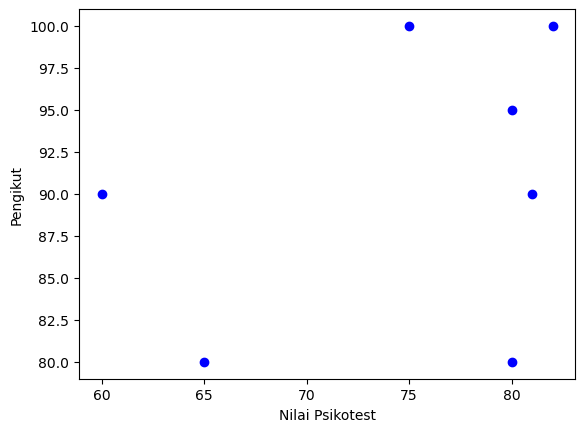

Coefficients:  [[0.31871891]]
Intercept:  [66.90143035]


Text(0, 0.5, 'Pengikut')

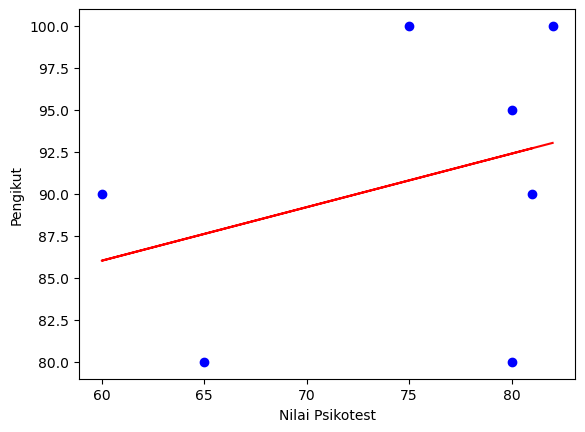

Mean absolute error: 6.11
Residual sum of squares (MSE): 39.73
R2-score: -5.80
